In [3]:
import pandas as pd
data = pd.read_csv('demographic.csv')
data

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [4]:
print(len(data))
print(len(data.columns))
print(data.loc[0])

195
5
Country Name            Aruba
Country Code              ABW
Birth rate             10.244
Internet users           78.9
Income Group      High income
Name: 0, dtype: object


In [5]:
data.head(2)
data.tail(2)

,Country Name,Country Code,Birth rate,Internet users,Income Group
193,Zambia,ZMB,40.471,15.4,Lower middle income
194,Zimbabwe,ZWE,35.715,18.5,Low income


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    195 non-null    object 
 1   Country Code    195 non-null    object 
 2   Birth rate      195 non-null    float64
 3   Internet users  195 non-null    float64
 4   Income Group    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [7]:
data.describe() #data.describe().transpose()

,Birth rate,Internet users
count,195.000000,195.000000
mean,21.469928,42.076471
std,10.605467,29.030788
min,7.900000,0.900000
25%,12.120500,14.520000
50%,19.680000,41.000000
75%,29.759500,66.225000
max,49.661000,96.546800


In [8]:
data = data.rename(columns={ "Birth rate": "BirthRate", 
"Internet users": "InternetUsers",
"Country Name": "CountryName",
"Country Code": "CountryCode",
"Income Group": "IncomeGroup"
})

In [9]:
data[20:26]
data[26:20:-1]

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
26,Brunei Darussalam,BRN,16.405,64.50,High income
25,Barbados,BRB,12.188,73.00,High income
24,Brazil,BRA,14.931,51.04,Upper middle income
23,Bolivia,BOL,24.236,36.94,Lower middle income
22,Bermuda,BMU,10.400,95.30,High income
21,Belize,BLZ,23.092,33.60,Upper middle income


In [10]:
data[::20]

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
0,Aruba,ABW,10.244,78.9000,High income
20,Belarus,BLR,12.500,54.1700,Upper middle income
40,Costa Rica,CRI,15.022,45.9600,Upper middle income
60,Gabon,GAB,30.555,9.2000,Upper middle income
80,India,IND,20.291,15.1000,Lower middle income
100,Libya,LBY,21.425,16.5000,Upper middle income
120,Mozambique,MOZ,39.705,5.4000,Low income
140,Poland,POL,9.600,62.8492,High income
160,Suriname,SUR,18.455,37.4000,Upper middle income
180,Uruguay,URY,14.374,57.6900,High income


In [11]:
data['CountryName'].head() # Call one column using string 

0                   Aruba
1             Afghanistan
2                  Angola
3                 Albania
4    United Arab Emirates
Name: CountryName, dtype: object

In [12]:
data[['IncomeGroup', 'CountryName']].head() # Call more than one column using List of string 

,IncomeGroup,CountryName
0,High income,Aruba
1,Low income,Afghanistan
2,Upper middle income,Angola
3,Upper middle income,Albania
4,High income,United Arab Emirates


In [13]:
data.BirthRate.head()

0    10.244
1    35.253
2    45.985
3    12.877
4    11.044
Name: BirthRate, dtype: float64

In [14]:
data.IncomeGroup[20:26]

20    Upper middle income
21    Upper middle income
22            High income
23    Lower middle income
24    Upper middle income
25            High income
Name: IncomeGroup, dtype: object

In [27]:
dataMultiply = data[16:26][['CountryName', 'BirthRate']]
dataMultiply['SquareBirth'] = round(dataMultiply.BirthRate ** 2)
dataMultiply

,CountryName,BirthRate,SquareBirth
16,Bulgaria,9.200,85.0
17,Bahrain,15.040,226.0
18,"Bahamas, The",15.339,235.0
19,Bosnia and Herzegovina,9.062,82.0
20,Belarus,12.500,156.0
21,Belize,23.092,533.0
22,Bermuda,10.400,108.0
23,Bolivia,24.236,587.0
24,Brazil,14.931,223.0
25,Barbados,12.188,149.0


In [28]:
dataMultiply['CountryName'].str.contains('Brazil')

16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24     True
25    False
Name: CountryName, dtype: bool

In [29]:
dataMultiply[dataMultiply['CountryName'].str.contains('Brazil')]

,CountryName,BirthRate,SquareBirth
24,Brazil,14.931,223.0


In [45]:
dataMultiply = dataMultiply.drop(columns='SquareBirth')
dataMultiply.sort_values('CountryName')

,CountryName,BirthRate
18,"Bahamas, The",15.339
17,Bahrain,15.040
25,Barbados,12.188
20,Belarus,12.500
21,Belize,23.092
22,Bermuda,10.400
23,Bolivia,24.236
19,Bosnia and Herzegovina,9.062
24,Brazil,14.931
16,Bulgaria,9.200


In [46]:
internetFilter = data.InternetUsers < 2
birthFilter = data.BirthRate > 30
data[birthFilter & internetFilter]

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
11,Burundi,BDI,44.151,1.3,Low income
52,Eritrea,ERI,34.800,0.9,Low income
55,Ethiopia,ETH,32.925,1.9,Low income
64,Guinea,GIN,37.337,1.6,Low income
127,Niger,NER,49.661,1.7,Low income
154,Sierra Leone,SLE,36.729,1.7,Low income
156,Somalia,SOM,43.891,1.5,Low income
172,Timor-Leste,TLS,35.755,1.1,Lower middle income


In [52]:
data[['BirthRate', 'IncomeGroup']].groupby('IncomeGroup').mean().sort_values('BirthRate')

,BirthRate
IncomeGroup,
High income,12.753433
Upper middle income,18.740646
Lower middle income,26.309140
Low income,37.238267


In [53]:
data.IncomeGroup.unique()

array(['High income', 'Low income', 'Upper middle income',
       'Lower middle income'], dtype=object)

In [56]:
data[data.CountryName == 'Malta']

,CountryName,CountryCode,BirthRate,InternetUsers,IncomeGroup
116,Malta,MLT,9.5,68.9138,High income


In [58]:
data.iat[3,4] # by location

'Upper middle income'

In [65]:
print(data.head(5))
data.at[3, 'BirthRate'] # by labels

            CountryName CountryCode  BirthRate  InternetUsers   
0                 Aruba         ABW     10.244           78.9  \
1           Afghanistan         AFG     35.253            5.9   
2                Angola         AGO     45.985           19.1   
3               Albania         ALB     12.877           57.2   
4  United Arab Emirates         ARE     11.044           88.0   

           IncomeGroup  
0          High income  
1           Low income  
2  Upper middle income  
3  Upper middle income  
4          High income  


12.877

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# avoid erros and warnings in matrice operation (like 0/0)
import warnings
warnings.filterwarnings('ignore')

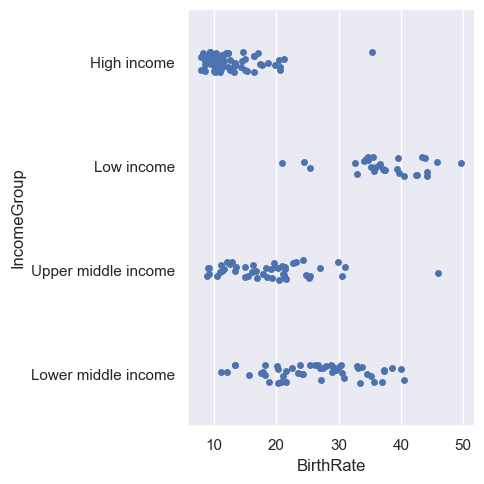

In [104]:
birthIncomeData = data[['BirthRate', 'IncomeGroup']]
sns.set_theme()

sns.catplot(birthIncomeData, y='IncomeGroup', x='BirthRate')


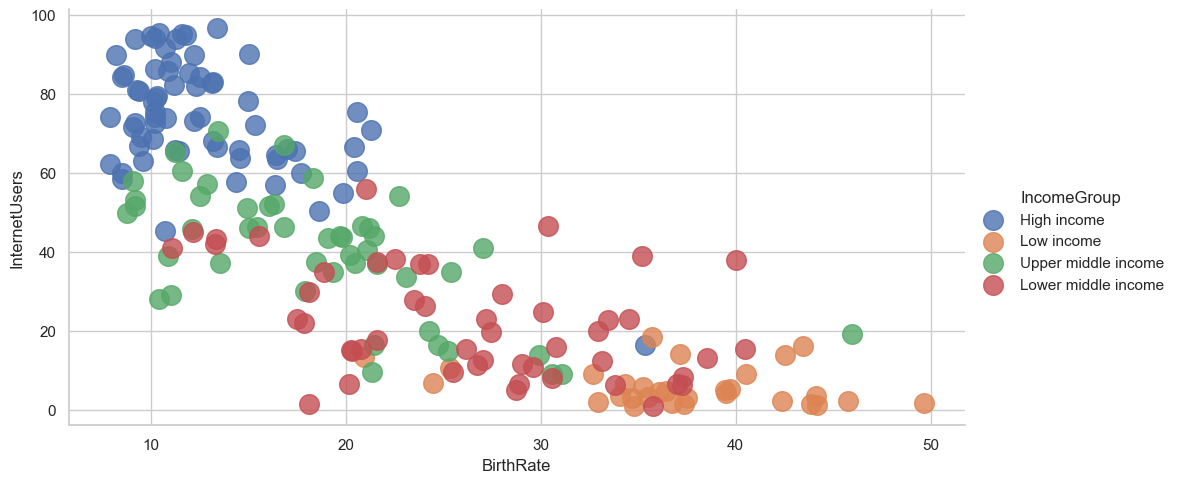

In [138]:
sns.lmplot(birthIncomeInternetData, x="BirthRate", y="InternetUsers",
fit_reg=False, hue='IncomeGroup', aspect=2,
scatter_kws={ "s": 200 }
)